# Problem 1 

**a)** Write a program that computes the first forward derivative $df(x)/dx$
$$
\frac{df(x)}{dx} = \frac{f(x+h) - f(x)}{h}
$$
for the function $f(x) = \sin(x)$ in $x = \pi/2$ and compute the rounding error defined as
$$
\Delta (h) = \left| f'(x) \frac{f(x+h) - f(x)}{h} \right|
$$
for different values of $h$. 
***

In [4]:
# cell 1 

import numpy as np
import matplotlib.pyplot as plt

    # function to be derived 
def f(x):
    return np.sin(x)

    # derivative of function to be derived 
def df(x):
    return np.cos(x)

x0 = np.pi

h = np.linspace(10**(-20),1, 100000) 

approx_df = (f(x0 + h) - f(x0))/h
delta_h = abs(df(x0) + approx_df) 

**b)** Make a graph of $\log(\Delta(h))$ vs $\log(h)$ for values of $h$ between $10^{-20}$ to $10^0$
***

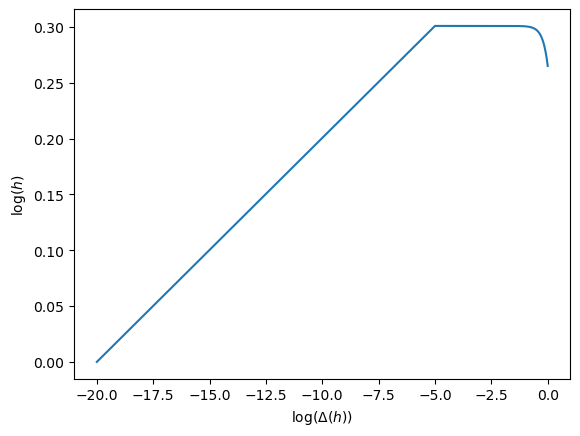

In [5]:
# cell 2

plt.plot(np.log10(h), np.log10(delta_h))
plt.xlabel(r'$\log(\Delta(h))$')
plt.ylabel(r'$\log(h)$')
plt.show()

**c)** Based on the graph of the previous part, estimate the optimal value of $h$ to calculate the first derivative of $f(x) = \sin(x)$ in $x = \pi/2$. 
***

To obtain an accurate value we should choose $h = 10^{-10}$. 

# Problem 2

**a)** Write a program that computes the following integral
$$
I(0,t) = \int_0^1 e^{-\tau} d\tau
$$
using simpson rule and trapezoide rule
***

In [3]:
# cell 3
import math
import pylab as plt
def f(x):
    return math.e**(-x)

q = int(input("How many slices do you want?"))
T = [0]*(q)
S = [0]*(q)
eT = [0]*(q)
eS = [0]*(q)
leT = [0]*(q)
leS = [0]*(q)

N = [0]*(q)


for n in range(1,q):
    a=0
    b=1 
    h=(b-a)/n
    N[n] = n
        #Exact value 
    I = 1 - (math.e)**(-1)

        #Trapeziod
    T[n] = 0.5*f(a) + 0.5*f(b)
    for k in range(1,n):
        T[n] += f(a + k*h)
    T[n] = T[n]*h

        #Simpson 
    S[n]=f(a)+f(b)
    for k in range(1,n,2):
        S[n] +=4*f(a+k*h)
    for k in range(2,n,2):
        S[n] +=2*f(a+k*h)
    S[n] = S[n]*(h/3)

    #error Trapeziod 
    eT[n] = abs((I-T[n])/I)
    #error Simpson
    eS[n] = abs((I-S[n])/I)
    leT[n] = math.log10(eT[n])
    leS[n] = math.log10(eS[n])

print("The exact value is:", I)
print("The Trapezoid rule provides a value of",T[-1])
print("Simpsons rule provides a value of",S[-1])
print("The relative error in trapeziod is:", eT[-1])
print("The relative error in simpson is:", eS[-1])



How many slices do you want? 10


The exact value is: 0.6321205588285577
The Trapezoid rule provides a value of 0.6327707548481981
Simpsons rule provides a value of 0.6177397530218741
The relative error in trapeziod is: 0.0010285949579703394
The relative error in simpson is: 0.02275009981218453


**b)** Compute the relative error $\epsilon$ = | (numerical value - exact value)/exact value | for each rule of integration for $N = 2, \: 10, \: 20, \: 40, \: 80, \: 180$. Present your result in form of a table. 
***

|  N  |     error trap       |     error simp       |
|-----|----------------------|----------------------|
|  2  | 0.020747041268399168 | 0.0003371527347566797|
| 10  | 0.0008331944775049469| 5.548948733879263e-07|
| 20  | 0.00020832465329463613| 3.4711890789371495e-08|
| 40  | 5.208279080648065e-05| 2.169977212581935e-09|
| 80  | 1.3020799424757656e-05| 1.3563143543903656e-10|
| 160 | 3.255206214297151e-06| 8.477535527703211e-12|


**c)** Make a graph log-log of the relative error vs N. Include the results of both rules of integration in the graphs. 
***

In [1]:
import math
import pylab as plt
def f(x):
    return math.e**(-x)

q = int(input("How many slices do you want?"))
T = [0]*(q)
S = [0]*(q)
eT = [0]*(q)
eS = [0]*(q)
leT = [0]*(q)
leS = [0]*(q)

N = [0]*(q)


for n in range(1,q):
    a=0
    b=1 
    h=(b-a)/n
    N[n] = n
        #El valor exacto 
    I = 1 - (math.e)**(-1)

        #Trapezio 
    T[n] = 0.5*f(a) + 0.5*f(b)
    for k in range(1,n):
        T[n] += f(a + k*h)
    T[n] = T[n]*h

        #Simpson 
    S[n]=f(a)+f(b)
    for k in range(1,n,2):
        S[n] +=4*f(a+k*h)
    for k in range(2,n,2):
        S[n] +=2*f(a+k*h)
    S[n] = S[n]*(h/3)

    #error Trapezio 
    eT[n] = abs((I-T[n])/I)
    #error Simpson
    eS[n] = abs((I-S[n])/I)
    leT[n] = math.log10(eT[n])
    leS[n] = math.log10(eS[n])

plt.plot(N,leS,leT)
plt.show()

hasta cuantos pedazos desea? 100


# Problem 3

**a)** A rock is thrown from a cliff at an angle of 53° with the horizontal. The cliff is 100 m high. The initial speed of the rock is 30 m/s. Ignore air resistance. The following program makes an approximate calculation of the rock's height when it hits the ground, the horizontal distance it has traveled, and the time the rock is in the air. The program contains a total of 10 errors. Identify and correct the errors, and make it display the results.  
```
from Math import pi, cos, sin
from numpy import linspace, show
from pylab import ylabel, plot

g = 9.8
theta0_degree = 53 # degrees
theta0_radian = (2*pi*theta0_degree)/360
v0 = 30 # m/s
x0 = 0 # m
y0 = 100 # m
vx = v0*cos(theta0_degree)
vy = v0*sin(theta0_degree)
X = [0]
Y = [100]
t = 0.0
ynew = y0

while (ynew > 0)
    t = t+0.01
    xnew = x0 + vx*t
    ynew = y0 + vy*t -0.5*g*^t2
    x.append(xnew)
    y.append(ynew)

print(‘Final Altitude Above Ground = ",ynew)
print("Final Horizontal Displacement", xnew)
print("Time to reach ground =" t)

show()
plot(x,y)
xlabel("Horizontal Distance")
ylabel("Altitude")
```
***

Final Altitude Above Ground =  0.07
Final Horizontal Displacement 137.03
Time to reach ground = 7.59


Text(0, 0.5, 'Altitude')

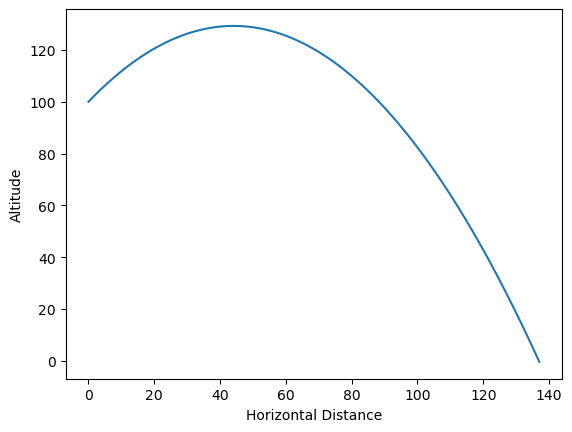

In [4]:
# cell 3 

from math import pi, cos, sin
from pylab import xlabel, ylabel, plot, show

g = 9.8
theta0_degree = 53 # degrees 
theta0_radian = (2*pi*theta0_degree)/360

v0 = 30
x0 = 0
y0 = 100
vx = v0*cos(theta0_radian) 
vy = v0*sin(theta0_radian) 
X = [0] 
Y = [100] 
t = 0.0 
ynew = y0

while (ynew > 0):
    t = t+0.01
    xnew = x0 + vx*t
    ynew = y0 + vy*t - 0.5*g*t**2 
    X.append(xnew) 
    Y.append(ynew)
    
print("Final Altitude Above Ground = ", f'{Y[len(Y)-2]:.2f}') 
print("Final Horizontal Displacement", f'{xnew:.2f}') 
print("Time to reach ground =", f'{t:.2f}')
show()

plot(X,Y)
xlabel("Horizontal Distance") 
ylabel("Altitude")